In [1]:
import random
import math
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

## Tic-Tac-Toe engine

In [2]:
from libs.TicTacToe import TicTacToe

In [3]:
state = np.array([0., 0., -1., -1., 1., -1., 1., 1., 0.])
TicTacToe().get_available_actions(state)

array([1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [4]:
ttt = TicTacToe()

while ttt.status=="Ongoing":

    valid_moves = ttt.next_moves()
    new_board = random.choice(valid_moves)
    ttt.play(new_board)
    print(np.reshape(ttt.board, (3,3)),"\n")
    if len(valid_moves)==0:
        break

print("[Winner]:",ttt.winner)

[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[ 0.  1. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] 

[[ 0.  1. -1.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]] 

[[ 0.  1. -1.]
 [ 0.  0.  1.]
 [ 0. -1.  0.]] 

[[ 0.  1. -1.]
 [ 0.  0.  1.]
 [ 0. -1.  1.]] 

[[ 0.  1. -1.]
 [ 0. -1.  1.]
 [ 0. -1.  1.]] 

[[ 0.  1. -1.]
 [ 0. -1.  1.]
 [ 1. -1.  1.]] 

[[-1.  1. -1.]
 [ 0. -1.  1.]
 [ 1. -1.  1.]] 

[[-1.  1. -1.]
 [ 1. -1.  1.]
 [ 1. -1.  1.]] 

[Winner]: 0


## Create policy and probability model

In [5]:
from libs.model import create_model, create_az_model

In [6]:
#model = create_model()
model = create_az_model()

In [7]:
model.summary()

Model: "tictactoe_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 tf.__operators__.add (TFOpLamb  (None, 9)           0           ['input_1[0][0]']                
 da)                                                                                              
                                                                                                  
 tf.cast (TFOpLambda)           (None, 9)            0           ['tf.__operators__.add[0][0]']   
                                                                                                  
 tf.one_hot (TFOpLambda)        (None, 9, 3)         0           ['tf.cast[0][0]']  

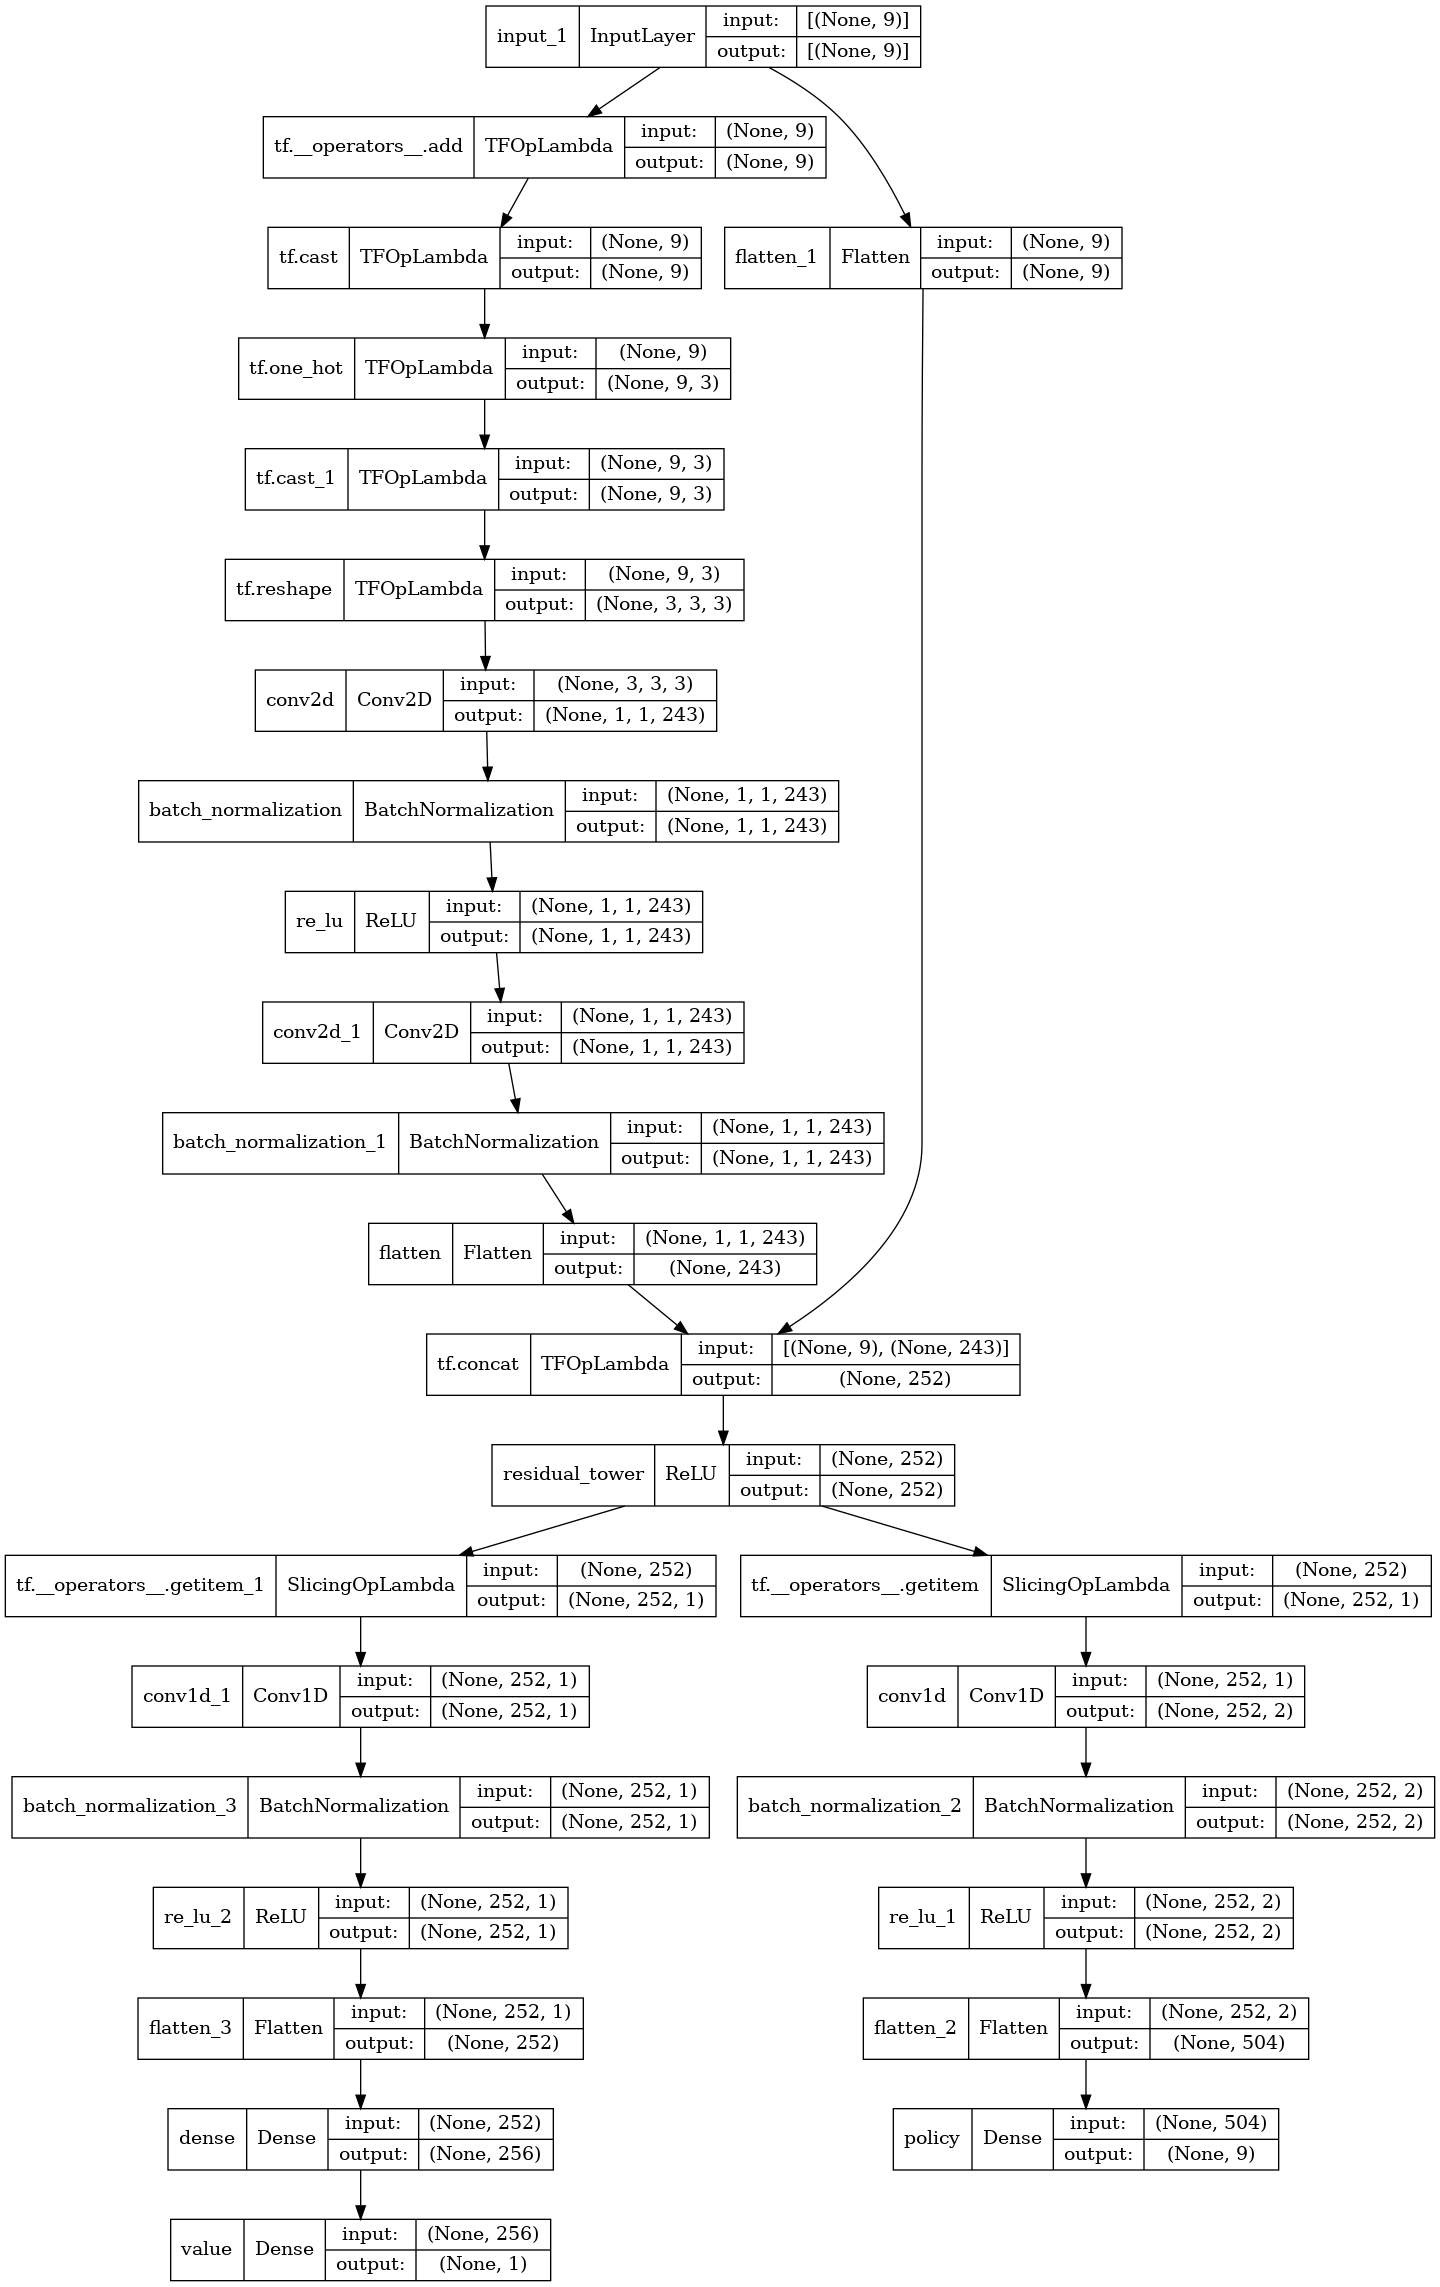

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

# Monte Carlo Tree Search

In [9]:
from libs.MCTS import MCTS

In [10]:
mcts = MCTS(game=TicTacToe(), n_simulations=100)

In [11]:
state = np.array([0., 0., -1., -1., 1., -1., 1., 1., 0.])

In [12]:
root = mcts.run(model=model, state=state, player=1)

In [13]:
root

State:
[ 0.  0. -1. -1.  1. -1.  1.  1.  0.]
Player:1
Value:0.98
Leaf:False
Visits:100
Children:
 -0: prior=0.3065613763544235
 -1: prior=0.3330942185541495
 -8: prior=0.36034440509142707

# Training

In [14]:
from libs.Trainer import Trainer

In [15]:
trainer = Trainer(game = TicTacToe, mcts = MCTS, model=create_az_model())

In [16]:
with open('libs/datasets/1000_tictactoe_temperature_1.pickle', 'rb') as handle:
    dataset = pickle.load(handle)

In [17]:
fit_history = trainer.train(dataset, n_epochs=1000, batch_size=20, learning_rate=1e-4)

Epoch 1/1000
355/355 [==============================] - 4s 5ms/step - loss: 2.7084 - policy_loss: 1.9815 - value_loss: 0.6744 - policy_mean_squared_error: 0.0246 - value_mean_squared_error: 0.6744 - lr: 1.0000e-04
Epoch 2/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.3965 - policy_loss: 1.7255 - value_loss: 0.6191 - policy_mean_squared_error: 0.0167 - value_mean_squared_error: 0.6191 - lr: 1.0000e-04
Epoch 3/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.3149 - policy_loss: 1.6666 - value_loss: 0.5968 - policy_mean_squared_error: 0.0142 - value_mean_squared_error: 0.5968 - lr: 1.0000e-04
Epoch 4/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.2585 - policy_loss: 1.6282 - value_loss: 0.5790 - policy_mean_squared_error: 0.0121 - value_mean_squared_error: 0.5790 - lr: 1.0000e-04
Epoch 5/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.2210 - policy_loss: 1.6055 - value_loss: 0.5646 - policy_mean_squa

355/355 [==============================] - 2s 5ms/step - loss: 2.0804 - policy_loss: 1.5371 - value_loss: 0.4935 - policy_mean_squared_error: 0.0072 - value_mean_squared_error: 0.4935 - lr: 5.9307e-35
Epoch 40/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.0834 - policy_loss: 1.5371 - value_loss: 0.4963 - policy_mean_squared_error: 0.0072 - value_mean_squared_error: 0.4963 - lr: 1.2005e-36
Epoch 41/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.0782 - policy_loss: 1.5378 - value_loss: 0.4904 - policy_mean_squared_error: 0.0073 - value_mean_squared_error: 0.4904 - lr: 2.1988e-38
Epoch 42/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.0851 - policy_loss: 1.5412 - value_loss: 0.4940 - policy_mean_squared_error: 0.0075 - value_mean_squared_error: 0.4940 - lr: 0.0000e+00
Epoch 43/1000
355/355 [==============================] - 2s 5ms/step - loss: 2.0817 - policy_loss: 1.5387 - value_loss: 0.4932 - policy_mean_squared_error

In [18]:
trainer.save_model()

INFO:tensorflow:Assets written to: saved_model/alpha_zero_model/assets


In [19]:
trainer.model.predict(np.array([[0., 0., -1., -1., 1., -1., 1., 1., 0.]]))

(array([[0.07571251, 0.2061923 , 0.00071313, 0.00186058, 0.00502703,
         0.00190205, 0.00342221, 0.00762676, 0.6975434 ]], dtype=float32),
 array([[0.68382186]], dtype=float32))

In [20]:
trainer.model.predict(np.array([[0., 0., 0., 0., -1., 1., -1., 0., 0.]]))

(array([[0.06633816, 0.12974702, 0.572155  , 0.0587806 , 0.00357746,
         0.00286439, 0.00104167, 0.06869128, 0.09680438]], dtype=float32),
 array([[-0.6137218]], dtype=float32))